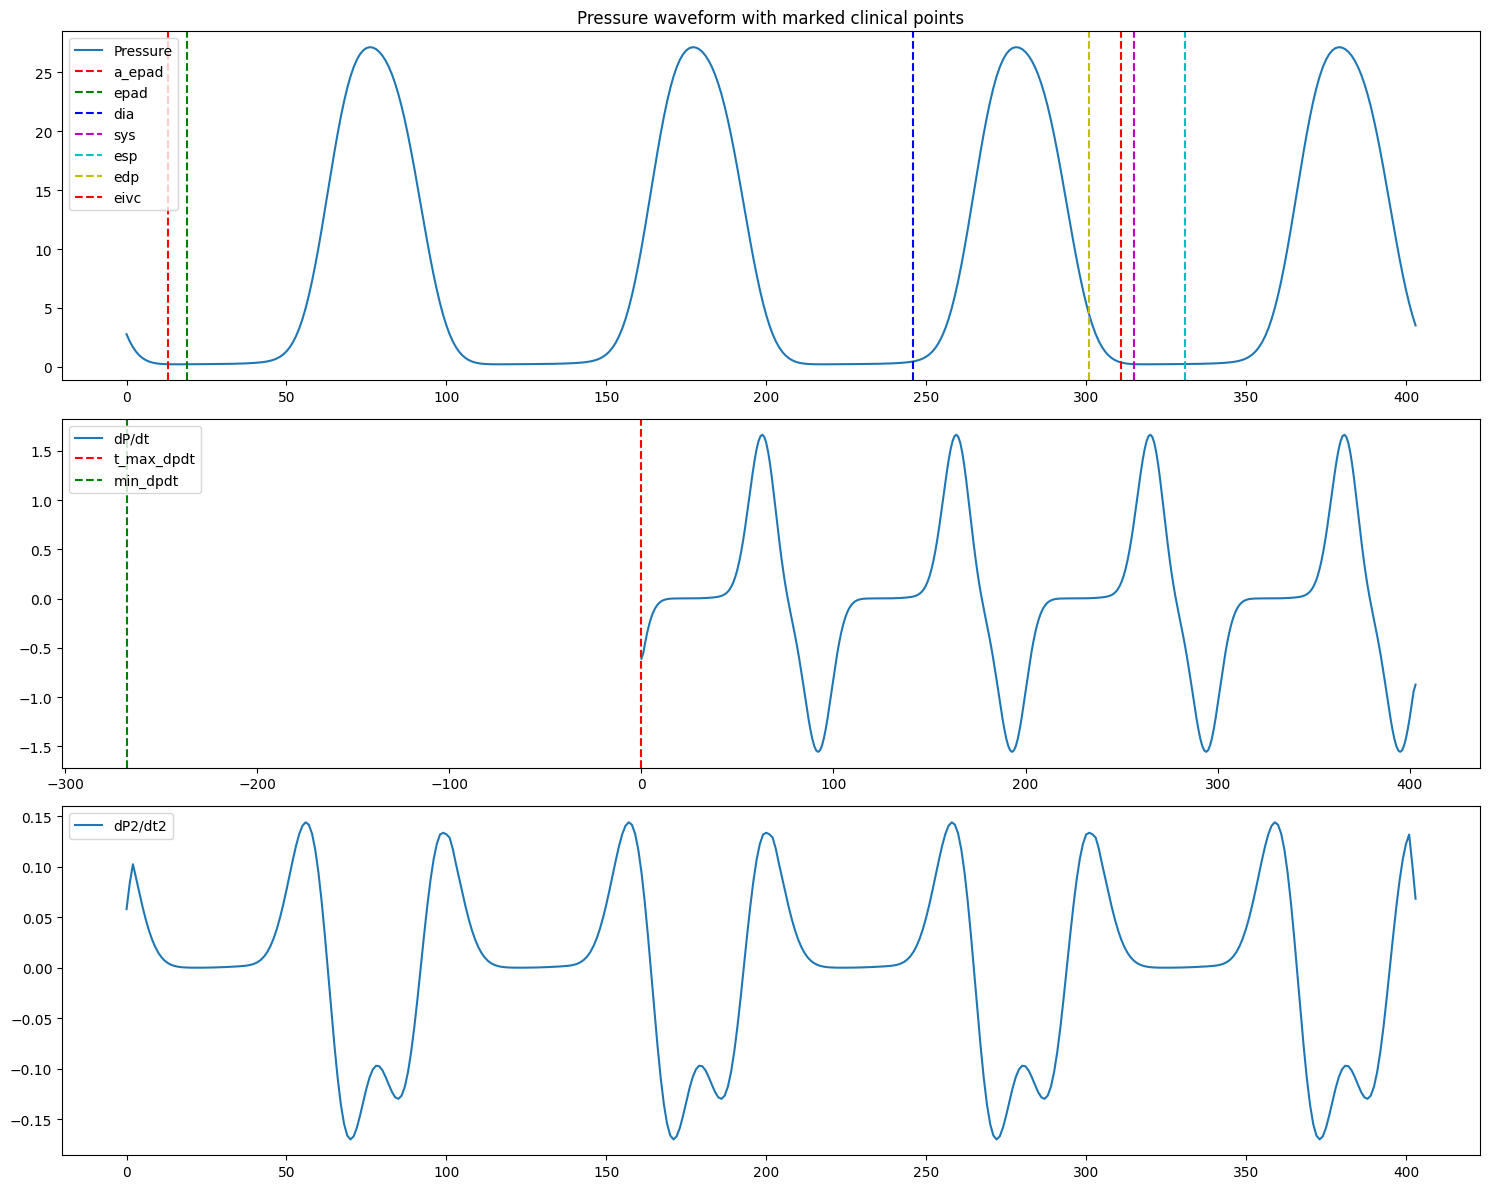

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from   scipy.ndimage import gaussian_filter1d
from   scipy.signal  import find_peaks

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

which_obs = 0
# Load the data from the CSV file
data = pd.read_csv('../output_synthetic/output_64_9params/waveform_resampled_all_pressure_traces_rv_with_pca.csv')
time_series = data.iloc[which_obs, 0:101]

columns_to_mark_p = ['a_epad', 'epad', 'dia_ind', 'sys_ind', 'esp_ind', 'edp_ind', 'eivc_ind']
p_labels = ['Pressure', 'a_epad', 'epad', 'dia', 'sys', 'esp', 'edp', 'eivc']


columns_to_mark_dp = ['t_max_dpdt', 'min_dpdt']


# Repeat "data" 6 times
data_repeated = np.tile(time_series.values, 4)

# Compute derivatives
first = gaussian_filter1d(input=data_repeated, sigma=1.0, order=1)
first_derivative = np.gradient(data_repeated)
second_derivative = np.gradient(first_derivative)

# Plot the time-series data, first and second derivatives stacked vertically
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(data_repeated, label="Pressue")
colors = ['r', 'g', 'b', 'm', 'c', 'y'] 
for i, col in enumerate(columns_to_mark_p):
    if col in data.columns:
        idx = int(data[col][which_obs])
        plt.axvline(x=idx, linestyle='--', color=colors[i % len(colors)], label=col)


plt.title("Pressure waveform with marked clinical points")
plt.legend(p_labels)

plt.subplot(3, 1, 2)
plt.plot(first_derivative, label="dP/dt")
colors = ['r', 'g', 'b', 'm', 'c', 'y'] 
for i, col in enumerate(columns_to_mark_dp):
    if col in data.columns:
        idx = int(data[col][which_obs])
        plt.axvline(x=idx, linestyle='--', color=colors[i % len(colors)], label=col)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(second_derivative, label='dP2/dt2')
plt.legend()
plt.tight_layout()
plt.show()
